# Image generators

This notebook is used for testing the effects of generators on the dataset.

In [3]:
import os
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from matplotlib import pyplot as plt
import PIL
%matplotlib inline

In [4]:
batch_size = 64
img_width,img_height = 224,224
img_width,img_height = 299,299
img_width,img_height = 311,311
validation_size = 0.2 #80% training
seed = 1337


In [5]:
training_path = '/home/labuser/deeplearning/thesis/datasets/processed/RGB/train'
testing_path = '/home/labuser/deeplearning/thesis/datasets/processed/RGB/test'

In [6]:
def generate_plot_pics(datagen,orig_img):
    dir_augmented_data = "data/preview"
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
    i = 0
    Nplot = 1
    for batch in datagen.flow(x,batch_size=1,
                          save_to_dir=dir_augmented_data,
                          save_prefix="pic",
                          save_format='png'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures 
            break

    ## -------------------------- ##
    ##   plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)

    ## original picture
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])        
    ax.imshow(orig_img)
    ax.set_title("original")

    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[]) 
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

In [7]:
"""
print("[*] Spliting data - {training}% training - {validation}% validation - {testing}% testing".format(training=(100-(validation_size*100)),validation=(validation_size*100),testing=10.0))

#train_image_generator = ImageDataGenerator(validation_split=validation_size, rescale=1.0 / 255)
train_image_generator = ImageDataGenerator(validation_split=validation_size,rescale=1.0 / 255,samplewise_center=True, samplewise_std_normalization=True)

test_image_generator = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
#test_image_generator = ImageDataGenerator(rescale=1.0 / 255)

train_set = train_image_generator.flow_from_directory(training_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
												 shuffle = True,
												 subset = 'training',
                                                 seed = seed
												 )
val_set = train_image_generator.flow_from_directory(training_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
												 shuffle = True,
												 subset = 'validation',
                                                 seed = seed
												 )
test_set = test_image_generator.flow_from_directory(directory = testing_path,
													target_size = (img_width, img_height),
													batch_size = 1,
													class_mode ='categorical',
													shuffle = False
													)
"""

'\nprint("[*] Spliting data - {training}% training - {validation}% validation - {testing}% testing".format(training=(100-(validation_size*100)),validation=(validation_size*100),testing=10.0))\n\n#train_image_generator = ImageDataGenerator(validation_split=validation_size, rescale=1.0 / 255)\ntrain_image_generator = ImageDataGenerator(validation_split=validation_size,rescale=1.0 / 255,samplewise_center=True, samplewise_std_normalization=True)\n\ntest_image_generator = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)\n#test_image_generator = ImageDataGenerator(rescale=1.0 / 255)\n\ntrain_set = train_image_generator.flow_from_directory(training_path,\n                                                 target_size = (img_width, img_height),\n                                                 batch_size = batch_size,\n                                                 class_mode = \'categorical\',\n\t\t\t\t\t\t\t\t\t\t\t\t shuffle = True,\n\t\t\t\t\t\t\t\t\t\t\t\t sub

In [8]:
orig_img = load_img('/home/labuser/deeplearning/thesis/datasets/processed/RGB/train/cerber/0147e7c0255a4e557fd9bc2dc7074c2a341b13ffe8fa68e873f33acd3d7b1c17.png')

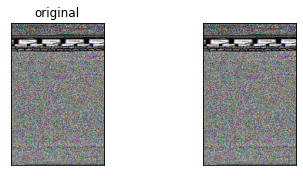

In [9]:
train_image_generator = ImageDataGenerator(rescale=1.0 / 255)

generate_plot_pics(train_image_generator,orig_img)

In [10]:
train_image_generator = ImageDataGenerator(rescale=1.0 / 255,samplewise_center=True, samplewise_std_normalization=True)

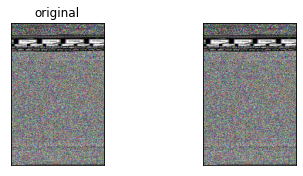

In [11]:
generate_plot_pics(train_image_generator,orig_img)

In [12]:
train_image_generator = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

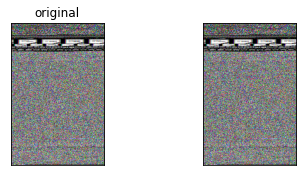

In [13]:
generate_plot_pics(train_image_generator,orig_img)

In [14]:
# Gray scale test

In [24]:
img_width,img_height = 112,112
img_width,img_height = 224,224

In [25]:
training_path = '/home/labuser/deeplearning/thesis/datasets/processed/GRAYSCALE/train'
testing_path = '/home/labuser/deeplearning/thesis/datasets/processed/GRAYSCALE/test'

In [26]:
train_set = train_image_generator.flow_from_directory(training_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
												 shuffle = True,
												 subset = 'training',
                                                 seed = seed
												 )

Found 5913 images belonging to 8 classes.


In [27]:
x,y = next(train_set)

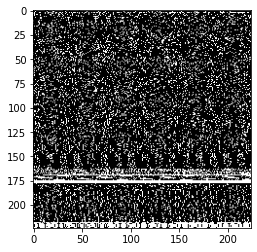

In [28]:
from PIL import Image 
for i in range(0,1):
    image = x[i]
    plt.imshow(image.astype('uint8'))
    plt.show()

In [20]:
    img_pil =  Image.fromarray(image.astype('uint8'))
    print('Pillow: ', img_pil.mode, img_pil.size)

Pillow:  RGB (112, 112)


In [21]:
    img = img_pil.convert('RGB')

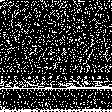

In [22]:
img

In [23]:
 print('Pillow: ', img_pil.mode, img_pil.size)

Pillow:  RGB (112, 112)
